In [9]:
import pandas as pd

df = pd.read_csv('energy-data\owid-energy-data.csv')

na_percentage = df.isna().mean() * 100

threshold = 20
columns_to_drop = na_percentage[na_percentage > threshold].index
df_cleaned = df.drop(columns=columns_to_drop)

df_population = df_cleaned.drop(
    columns=['oil_production']).dropna(subset=['population'])

df_population['year'] = df_population['year'].astype(int)
df_population['population'] = df_population['population'].astype(float)

df_population_sorted = df_population[df_population['year'] >= 1900].sort_values(by=[
                                                                                'country', 'year'])
df_population_sorted['population_growth'] = df_population_sorted.groupby(
    'country')['population'].pct_change() * 100

df_population_sorted['decade'] = (df_population_sorted['year'] // 10) * 10

df_population_decade = df_population_sorted.groupby(['country', 'decade']).agg({
    'population': 'last',
    'population_growth': 'mean'
}).reset_index()


continents = ['Africa', 'Asia', 'Europe', 'North America',
              'South America', 'Oceania', 'Antarctica']

df_population_decade['type'] = df_population_decade['country'].apply(
    lambda x: 'continent' if x in continents else 'country')

df_population_decade.head(50), df_population_decade.shape

unique_continents = df_population_decade[df_population_decade['type']
                                         == 'continent']['country'].unique()


categories_to_remove = [
    'Lower-middle-income countries',
    'Upper-middle-income countries',
    'High-income countries',
    'Low-income countries',
    'European Union (27)'
]
df_filtered = df_population_decade[~df_population_decade['country'].isin(
    categories_to_remove)]

df_filtered.loc[df_filtered['country'] == 'World', 'type'] = 'world'

# df_filtered.to_csv('final_population_data.csv', index=False)
# df_population_decade_sorted = df_filtered.sort_values(by=['population'], ascending=False)
# df_population_decade_sorted.head(50)

df_filtered.to_csv('test2.csv')

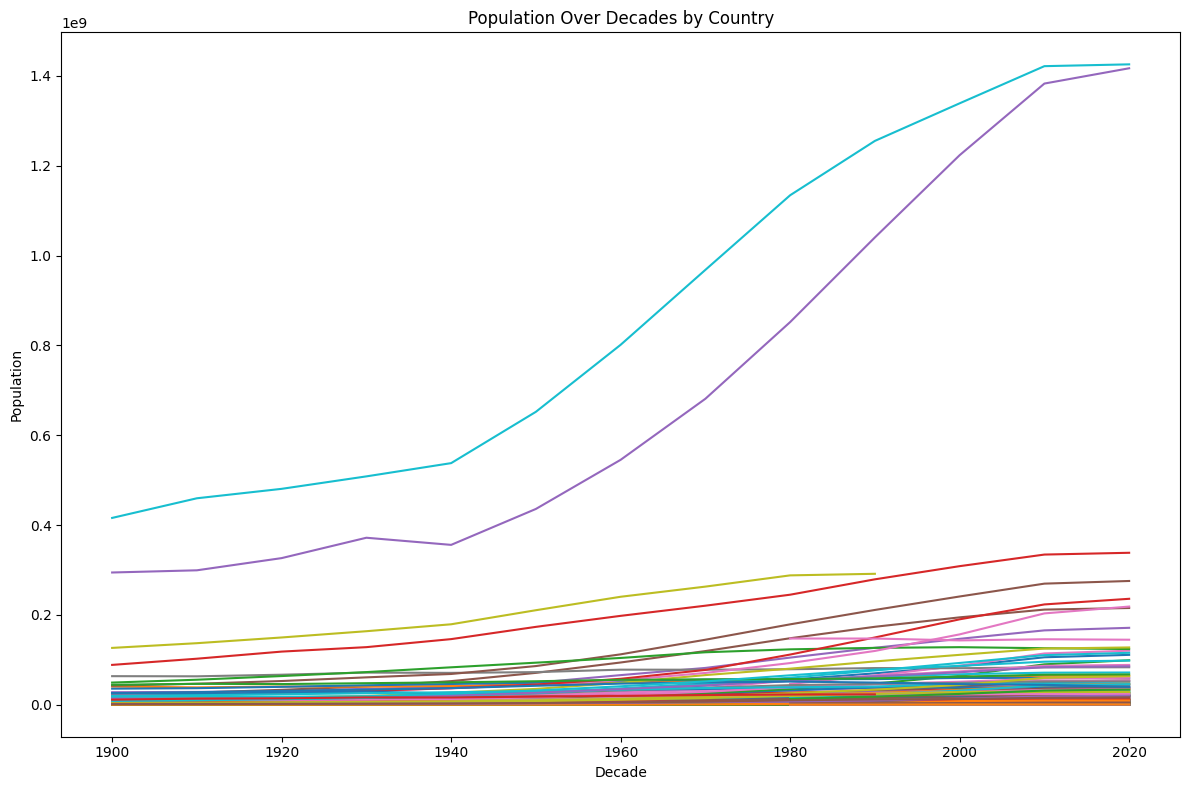

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('test2.csv')
df['decade'] = pd.to_numeric(df['decade'], errors='coerce')
df['population'] = pd.to_numeric(df['population'], errors='coerce')
df_countries = df[df['type'] == 'country']
df_countries_sorted = df_countries.sort_values(by=['country', 'decade'])

plt.figure(figsize=(12, 8))

for country, group in df_countries_sorted.groupby('country'):
    plt.plot(group['decade'], group['population'], label=country)

plt.xlabel('Decade')
plt.ylabel('Population')
plt.title('Population Over Decades by Country')

# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.tight_layout()
plt.show()